# Problema do Mercado
Os Principais Problemas dos hospitais no Brasil
  - Longo tempo de espera
  - Desperdício de tempo
  - Má administração
  - Falta de Organização

Em tempos de pandemia esses problemas eclodiram
##OBJ: BUSCAR VERIFICAR OS HOSPIATAIS QUE MAIS SE ENCAIXARAIM NO NEGOCIO COM BASE EM SUA AVALIAÇÃO
Nossos Produtos podem ajudar a administrar o tempo e a melhora nos atendimentos com isso melhorando a avaliação dos hospitais.
obs: todos os hospitais são dos EUA. junto com suas respectivas avaliações

## ler traduzir

In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Projeto/hospital.xlsx')

### Trantando os Dados com o obj de ajudar o entendimento

In [ ]:
### Traduzindo o Dataframe
colunas={'Provider ID':'ID', 'Hospital Name':'Nome Hospital', 'Address':'Endereco', 'City':'Cidade', 'State':'Estado', 'ZIP Code':'CEP',
       'County Name':'Nome do Condado', 'Phone Number':'Telefone', 'Hospital Type':'Tipo do Hosiptal', 'Hospital Ownership':'Propriedade do hospital',
       'Emergency Services':'Servico Emergencial', 'Meets criteria for meaningful use of EHRs':'Atende aos critérios para uso significativo de EHRs',
       'Hospital overall rating':"Pontoacao do Hospital", 'Mortality national comparison':'Comparacao Mortalidade Nacional',
       'Safety of care national comparison':'Comparação nacional de segurança do cuidado', 'Readmission national comparison':'Comparação nacional de readmissão',
       'Patient experience national comparison':'Comparação nacional da experiência do paciente',
       'Effectiveness of care national comparison':'Eficacia da comparação nacional de cuidados',
       'Timeliness of care national comparison':"Pontualidade do cuidado comparação nacional",
       'Efficient use of medical imaging national comparison':'Uso eficiente de comparação nacional de Imagiologia médica'}
df=df.rename(columns=colunas)#renomeando os nomes para ficar mais facil o entendimento para todos
#traduzindo os valores para o portugues para facilitar o entendimento de todos
df['Tipo do Hosiptal'].replace({'Acute Care Hospitals':'Hospitais de Cuidados Agudos', 'Critical Access Hospitals':'Hospitais de Acesso Crítico', 'Childrens':'Criancas'},inplace=True)
df['Propriedade do hospital'].replace({'Voluntary non-profit - Private':'Sem fins lucrativos voluntários - Privado','Government - Hospital District or Authority':'Governo - Distrito Hospitalar ou Autoridade','Government - Local':'Governo - Local', 'Voluntary non-profit - Other':'Organização sem fins lucrativos voluntária - Outros','Proprietary':'Proprietário', 'Government - State': 'Governo - Estado','Voluntary non-profit - Church':'Sem fins lucrativos voluntários - Igreja', 'Tribal':'Tribal', 'Government - Federal':'Governo - Federal','Physician':'Médico'},inplace=True)
df['Servico Emergencial'].replace({'Yes':'Sim','No':'Não'},inplace=True)
df['Atende aos critérios para uso significativo de EHRs'].replace({'Y':'S', 'Not Available':'Indisponivel'},inplace=True)
df[['Pontoacao do Hospital', 'Comparacao Mortalidade Nacional','Comparação nacional de segurança do cuidado','Comparação nacional de readmissão','Comparação nacional da experiência do paciente','Eficacia da comparação nacional de cuidados','Pontualidade do cuidado comparação nacional','Uso eficiente de comparação nacional de Imagiologia médica']]=df[['Pontoacao do Hospital', 'Comparacao Mortalidade Nacional','Comparação nacional de segurança do cuidado','Comparação nacional de readmissão','Comparação nacional da experiência do paciente','Eficacia da comparação nacional de cuidados','Pontualidade do cuidado comparação nacional','Uso eficiente de comparação nacional de Imagiologia médica']].replace({'Not Available':'Indisponivel', 'Above the national average':'Acima da média nacional','Same as the national average':'Igual à média nacional', 'Below the national average':'Abaixo da média nacional'})

### verificando o nivel de cada avaliação e vendo as que são indisponiveis por falta de valores

Pontuação dos Hospitais
Indisponivel    1245
5                 82
4                939
3               1761
2                678
1                107
Name: Pontoacao do Hospital, dtype: int64


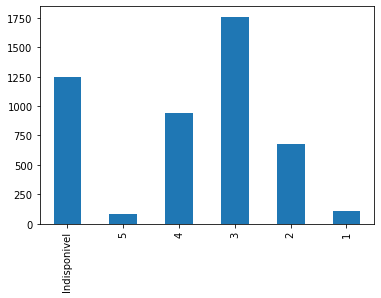

In [ ]:
print('Pontuação dos Hospitais')
print(df['Pontoacao do Hospital'].value_counts(sort=False))
df['Pontoacao do Hospital'].value_counts(sort=False).plot(kind='bar')

## Objetivo da Analise
essa será a nossa classificação basiada na necessidade, quando mais a empresa tem dificuldade mior a sua classificação dos leads
  - leads quentes:
    - São hospitais com baixa nota geral E com atendimento demorado
  - leads mornos:
    - São hospitais com baixo nota geral OU com o atendimento demorado
  - leads Neutros:
    - Pontuação desconhecido e com media de tempo atendimento igual a nacional
    - Pontuação 4 para cima e com media de tempo atendimento igual a nacional
  - leads frios:
    - São hospitais com altas notas e com um atendimento rapido e eficaz


In [ ]:
final=df
df['Pontoacao do Hospital'].replace({'Indisponivel':0},inplace=True)
df['Pontoacao do Hospital']=df['Pontoacao do Hospital'].astype(int)

In [ ]:
#Frio
df.loc[(df['Pontoacao do Hospital']>=4)|(df['Pontualidade do cuidado comparação nacional']=='Acima da média nacional'),'Qualidade do Lead']='Frio'
#Neutro
df.loc[df['Pontualidade do cuidado comparação nacional']=='Igual à média nacional','Qualidade do Lead']='Neutro'#acima de 4 ou 0 e media nacional
#Morno
df.loc[(df['Pontoacao do Hospital']<4)&(df['Pontoacao do Hospital']!=0),'Qualidade do Lead']='Morno'
df.loc[df['Pontualidade do cuidado comparação nacional']=='Abaixo da média nacional','Qualidade do Lead']='Morno'
#Quente
df.loc[(df['Pontoacao do Hospital']<3)&(df['Pontoacao do Hospital']!=0)&(df['Pontualidade do cuidado comparação nacional']=='Abaixo da média nacional'),'Qualidade do Lead']='Quente'

In [ ]:
df['Pontoacao do Hospital']=df['Pontoacao do Hospital'].astype(str)#coloando em formato texto
df['Pontoacao do Hospital'].replace({0:'Indisponivel'},inplace=True)

In [ ]:
# Drop valores que não podemos classificar por falta de dados
df.loc[(df['Pontoacao do Hospital']==0) & (df['Pontualidade do cuidado comparação nacional']=='Indisponivel'),['Pontoacao do Hospital','Pontualidade do cuidado comparação nacional']]=None
df=df.dropna(subset=['Pontoacao do Hospital', 'Pontualidade do cuidado comparação nacional'])

Morno           2280
Indisponivel    1014
Neutro           559
Frio             540
Quente           419
Name: Qualidade do Lead, dtype: int64


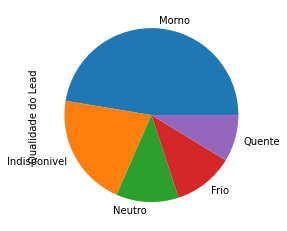

In [ ]:
# Vizualizar a Classificação dos Leads inicial com os valores encontrados
df['Qualidade do Lead'].fillna('Indisponivel',inplace=True)
print(df['Qualidade do Lead'].value_counts())
df['Qualidade do Lead'].value_counts().plot(kind='pie')

Essa classificação pode ser mudada, ja que levei em consideração apenas duas colunas para classificar os leads, pois a demora nos atendimentos e a baixa nota geral parece ser o principal foco para entrarmos em contato, porem podemos posteriormenente fazer uma classificação mais relevante no valores insdisponivel e morno, e considerar outras colunas para fazer novas classificações

## Tratando os Indisponiveis com uma anaise de pontuação

In [ ]:
#pontualizando para podermos escolher a classificação
df[['Pontoacao do Hospital','Comparacao Mortalidade Nacional','Comparação nacional de segurança do cuidado','Comparação nacional de readmissão','Comparação nacional da experiência do paciente','Eficacia da comparação nacional de cuidados','Pontualidade do cuidado comparação nacional','Uso eficiente de comparação nacional de Imagiologia médica']]=df[['Pontoacao do Hospital','Comparacao Mortalidade Nacional','Comparação nacional de segurança do cuidado','Comparação nacional de readmissão','Comparação nacional da experiência do paciente','Eficacia da comparação nacional de cuidados','Pontualidade do cuidado comparação nacional','Uso eficiente de comparação nacional de Imagiologia médica']].replace({'Indisponivel':0,'Igual à média nacional':1,'Abaixo da média nacional':3,'Acima da média nacional':0})
df[['Pontoacao do Hospital', 'Comparacao Mortalidade Nacional','Comparação nacional de segurança do cuidado','Comparação nacional de readmissão','Comparação nacional da experiência do paciente','Eficacia da comparação nacional de cuidados','Pontualidade do cuidado comparação nacional','Uso eficiente de comparação nacional de Imagiologia médica']]=df[['Pontoacao do Hospital', 'Comparacao Mortalidade Nacional','Comparação nacional de segurança do cuidado','Comparação nacional de readmissão','Comparação nacional da experiência do paciente','Eficacia da comparação nacional de cuidados','Pontualidade do cuidado comparação nacional','Uso eficiente de comparação nacional de Imagiologia médica']].astype(int)

In [ ]:
df['Pontoacao do Hospital']=df['Pontoacao do Hospital'].replace({4:0,5:-1,3:1,1:3})
df['Total']=df[['Pontoacao do Hospital', 'Comparacao Mortalidade Nacional','Comparação nacional de segurança do cuidado','Comparação nacional de readmissão','Comparação nacional da experiência do paciente','Eficacia da comparação nacional de cuidados','Pontualidade do cuidado comparação nacional','Uso eficiente de comparação nacional de Imagiologia médica']].sum(axis=1)

In [ ]:
df.loc[(df['Total']>=3)&(df['Qualidade do Lead']=='Indisponivel'),'Qualidade do Lead']='Neutro' #Neutro
df.loc[(df['Total']<3)&(df['Qualidade do Lead']=='Indisponivel'),'Qualidade do Lead']='Frio' #Frio

Morno     2280
Frio      1527
Neutro     586
Quente     419
Name: Qualidade do Lead, dtype: int64


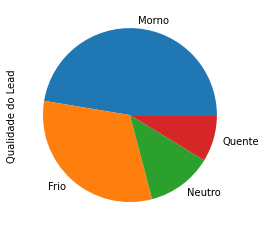

In [ ]:
print(df['Qualidade do Lead'].value_counts())
df['Qualidade do Lead'].value_counts().plot(kind='pie')

## Tratar mornos que são quentes e neutros

In [ ]:
df.loc[(df['Qualidade do Lead']=='Morno')&(df['Total']>=16),'Qualidade do Lead']="Quente"
df.loc[(df['Qualidade do Lead']=='Morno')&(df['Total']<=6)&(df['Pontualidade do cuidado comparação nacional']!=3),'Qualidade do Lead']='Neutro'

Morno     1665
Frio      1527
Neutro    1164
Quente     456
Name: Qualidade do Lead, dtype: int64


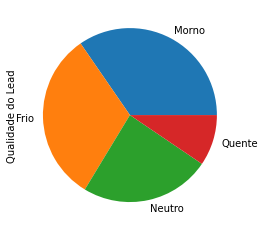

In [ ]:
print(df['Qualidade do Lead'].value_counts())
df['Qualidade do Lead'].value_counts().plot(kind='pie')

In [ ]:
tabela=df['Qualidade do Lead'].value_counts()

## Vizualizar os top quentes 

In [ ]:
df.loc[(df['Qualidade do Lead']=='Quente')&(df['Total']>=19),'Top']='Sim'
df['Top'].fillna('Não',inplace=True)

In [ ]:
final['Qualidade do Lead']=df['Qualidade do Lead']
final['Total'] = df['Total']

## Planilha Final

In [ ]:
qual_est=final[['Estado','Qualidade do Lead']].value_counts()
est_count=final['Estado'].value_counts()

In [ ]:
# final.to_excel('/content/drive/MyDrive/Projeto/hospital_analisado.xlsx',index=False)
# tabela.to_excel('/content/drive/MyDrive/Projeto/tabela.xlsx')
with pd.ExcelWriter('/content/drive/MyDrive/Projeto/hospital_analisado.xlsx') as writer:  
    final.to_excel(writer, sheet_name='Hospitais',index=False)
    tabela.to_excel(writer, sheet_name='Counts')
    qual_est.to_excel(writer, sheet_name='Counts_est_qualif')
    est_count.to_excel(writer, sheet_name='Counts_est')